In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('countries.csv')

In [3]:
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Scatter Plots?
- A way to visualize how two numeric variables are related in your data
#### why scatter plots?
- Relationships between multiple variables
- helps you find outliers

### problem1: comparing gdp per capita and life expectancy in year 2007


In [4]:
data_2007=data[data['year']==2007]

In [5]:
data_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [6]:
# now comparing gdp per capita and life expectancy using scatter plot

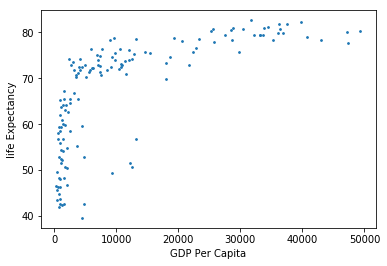

In [7]:
plt.scatter(data_2007['gdpPerCapita'],data_2007['lifeExpectancy'],3)# we can adjust the size of dots in third argument
plt.xlabel('GDP Per Capita')
plt.ylabel('life Expectancy')
plt.show()

In [8]:
# we can notice that higher the country's GDP per Capita it tends to be higher the life Expectancy
# we can double check this by finding a co-relationship between GDP per Capita and life Expectancy: see below

In [9]:
data_2007['gdpPerCapita'].corr (data_2007['lifeExpectancy'])

0.6786623986777587

In [10]:
# as you can see they are highly co-related

In [11]:
# If you see the graph again, gdp per capita and life expectancy don't seem to have linear co-relation.
# the life expectancy goes up very quickly when the gdp per capita goes down to a lower range.
# when a country has more gdp per capita and additional increase in gdp per capita seems to have less effects in--
#-life expectancy


In [12]:
# looking data in log scale not in linear scale
# To do this I am going to use the log np.log10() function
# np.log10() is a numpy function that computes the log of the given numbers with the base 10
# Example is given below:


In [13]:
np.log10([10,100,1000])

array([1., 2., 3.])

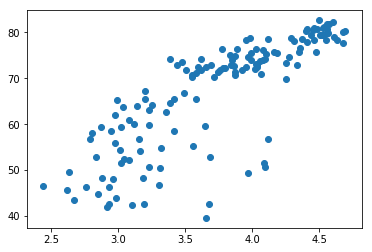

In [14]:
#This says draw a scatter plot not with raw gdp per capita but with log of gdp per capita with base 10
plt.scatter(np.log10(data_2007['gdpPerCapita']),data_2007['lifeExpectancy'])
plt.show()

 we can see that that gdp per capita is shown in logscale in x-axis.
This time the graph seems to show more of a linear co-relation.

In [15]:
#finding a co-relationship between log of (GDP per Capita )and life Expectancy
np.log10(data_2007['gdpPerCapita']).corr(data_2007['lifeExpectancy'])

0.8089802514849209

In [16]:
# Result shows the co-relation of log of gdp per capita with life Expectancy in 2007 has more co-relation compare to -
#--.raw gdp per capita. so, using np.log10()seems to be more accurate model.


In [17]:
# running the above model for each available year.To do this, we are going to run for loop for each year
sorted_year=sorted(set(data['year']))


In [18]:
sorted_year

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

In [19]:
for given_year in sorted_year:
    
    data_year = data[data['year']==given_year]
    plt.scatter(data_year['gdpPerCapita'],data_year['lifeExpectancy'],3)
    plt.title(given_year)
    plt.xlim(0,60000)
    plt.ylim(25,85)
    plt.xlabel('GDP Per Capita')
    plt.ylabel('Life Expectancy')
    plt.savefig(str(given_year),dpi=200)# dpi = dots per inch
    plt.clf()# we need this line to clear the current plot.
    
                      
                      

<Figure size 432x288 with 0 Axes>

In [20]:
data[data['gdpPerCapita']>60000]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


In [21]:
for given_year in sorted_year:
    data_year = data[data.year == given_year]
    plt.scatter(np.log10(data_year.gdpPerCapita), data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(2, 5)
    plt.ylim(25, 85)
    plt.xlabel('GDP Per Capita (log scale)')
    plt.ylabel('Life Expectancy')
    plt.savefig(str(given_year),dpi=200)# dpi = dots per inch
    plt.clf()# we need this line to clear the current plot.
   

<Figure size 432x288 with 0 Axes>